# CSCI 632 Homework 4 Answers

**Instructions**

* **Insert all code, plots, results, and discussion** into this Jupyter Notebook.
* Your homework should be submitted as a **single Jupyter Notebook** (.ipynb file).
* While working, you use Google Colab by uploading this notebook and performing work there. Once complete, export the notebook as a Jupyter Notebook (.ipynb) and submit it to **Blackboard.**

You can answer mathematical questions either by:
* using LaTeX in a markdown cell, or
* pasting a scanned or photographed handwritten answer.


## Problem 1

Prove that the vector $\mathbf{n} = (\Theta_1, \Theta_2, \Theta_3)$ is a surface normal
to the plane given by $\mathbf{\Theta}^T\mathbf{x} = 0$ where $\mathbf{\Theta}$
is given by

$$
\mathbf{\Theta} = \begin{bmatrix}
  \Theta_0 \\
  \Theta_1 \\
  \Theta_2 \\
  \Theta_3
\end{bmatrix}
$$

$$
\mathbf{x} = \begin{bmatrix}
  1  \\
  x_1 \\
  x_2 \\
  x_3
\end{bmatrix}
$$

where $$(x_1, x_2, x_3)$$ is any point that lies on the plane.

As mentioned in the instructions at the beginning of this homework, you can input the answer either using LaTeX or by scanning in a handwritten page and pasting it into the notebook as a base64 encoded image.

**Hint:** one only needs to show that $\mathbf{n}$ is perpendicular to vectors in the plane.  Consider the definition and properties of the **dot product** to guide your proof.



**Answer 1**

One way to demonstrate that a vector is normal is to show that it has
a zero dot product with two vectors that span the plane.  Any two vectors
in a plane that are not collinear can be said to span the plane meaning
that any third vector in the plane can be written as a linear combination
of the first two vectors.

We can construct two non-colinear vectors in the plane by picking
three points in the plane wherein for each we pick two of the
components to be zero and then solve for the third component.  We
then take the difference between these points to create two
vectors.  To guarantee that the vectors are not collinear we choose
different components of each vector to be zero.

For each point

\begin{equation}
  0 = \Theta_0 + \Theta_1 x_1 + \Theta_2 x_2 + \Theta_3 x_3
\end{equation}

Find three points in the plane.

\begin{align*}
  P_1: 0 &= \Theta_0 + \Theta_1 x_1 + 0 + 0 \\
  P_2: 0 &= \Theta_0 + 0 + \Theta_2 x_2 + 0 \\
  P_3: 0 &= \Theta_0 + 0 + 0 + \Theta_3 x_3 \\
\end{align*}

\begin{align*}
  P_1 &= (-\frac{\Theta_0}{\Theta_1}, 0, 0) \\
  P_2 &= (0, -\frac{\Theta_0}{\Theta_2}, 0) \\
  P_3 &= (0, 0, -\frac{\Theta_0}{\Theta_3}) \\
\end{align*}

Now define two vectors spanning the plane:

\begin{align*}
  \mathbf{v_1} &= P2 - P1 = \bigg(\frac{\Theta_0}{\Theta_1},-\frac{\Theta_0}{\Theta_2}, 0\bigg) \\
  \mathbf{v_2} &= P3 - P1 = \bigg(\frac{\Theta_0}{\Theta_1}, 0, -\frac{\Theta_0}{\Theta_3}\bigg) \\
\end{align*}

Take the dot product between what we are proving is normal and each
of the vectors $\mathbf{v_1}$ and $\mathbf{v_2}$.

\begin{align*}
  \mathbf{n}^T \mathbf{v_1} &= \Theta_1 \frac{\Theta_0}{\Theta_1} - \Theta_2 \frac{\Theta_0}{\Theta_2} + 0 = \Theta_0 - \Theta_0 + 0 = 0 \\
  \mathbf{n}^T \mathbf{v_2} &= \Theta_1 \frac{\Theta_0}{\Theta_1} - \Theta_3 \frac{\Theta_0}{\Theta_3} = 0 \\
\end{align*}

Since the dot products of vector $\mathbf{n}$ with two vectors spanning the plane are both zero, we can say that $\mathbf{n}$ is normal to the plane.

$\square$


---
## Problem 2. Gradients

Some problems involving matrix calculus.  Even those who have taken a linear algebra course may not be
familiar with matrix calculus.   So let's do a few problems starting from the more familiar scalar calculus 
and then vector calculus.

* $x$ is a scalar. $f(x)$ is a scalar function means the output is a scalar. $\nabla = \nabla_x = \frac{d}{dx}$. Ex: $\nabla_x x^2 = 2x$.
* $\mathbf{x}$ is a vector.  $f(\mathbf{x})$ is a scalar function that takes a vector argument.

$$\nabla f(\mathbf{x}) = \begin{bmatrix}
  \frac{\partial f}{\partial x_1} \\
  \frac{\partial f}{\partial x_2} \\
  \vdots \\
  \frac{\partial f}{\partial x_n} \\
\end{bmatrix}
$$

#### Example II.1: Gradient of a paraboloid

$$f(\mathbf{x}) = -(x_1^2 + x_2^2)$$

$$\nabla f(\mathbf{x}) = \begin{bmatrix} -2x_1 \\ -2x_2 \end{bmatrix}$$

In [94]:
import matplotlib.pyplot as plt
import numpy as np

def f(x1, x2):
    return -(x1**2 + x2**2)/10


# Generate the grid
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)    # populates two dimensional arrays wherein one represents x-values and the other y-values
                                # This is a bit redundant, but numpy will evalute the function by sweeping across both
                                # matrices in parallel using vector operations.
Y = f(X1, X2)                   # evaluates at every (x1, x2) position in the X1, X2 matrices.



In [95]:
# Compute the gradients
#grad_x1, grad_x2 = np.gradient(Y, x1, x2)  This doesn't do what I expected.
#print(grad_x1)
#print(grad_x2)

grad_x1 = -2*X1/10
grad_x2 = -2*X2/10
#print(gradX1)

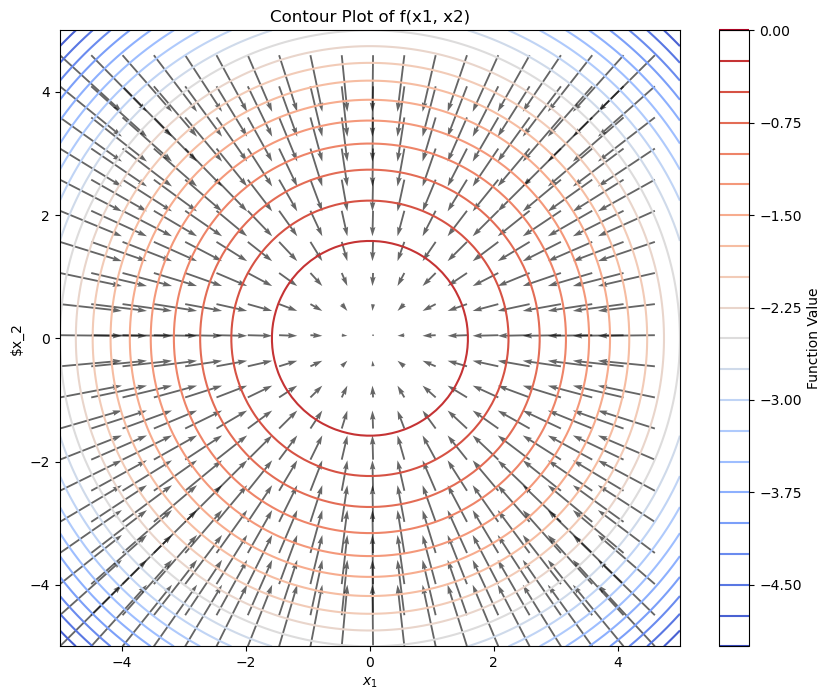

In [96]:
# Select every 5th point for a sparse quiver plot
skip = (slice(None, None, 5), slice(None, None, 5))

# Plot the contour and the sparser gradients
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Y, levels=20, cmap='coolwarm')
plt.quiver(X1[skip], X2[skip], grad_x1[skip], grad_x2[skip], color='black', angles='xy', scale_units='xy', scale=1, alpha=0.6)

# Add labels and display the plot
plt.title("Contour Plot of f(x1, x2)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2")
plt.colorbar(contour, label="Function Value")
plt.show()

#### Example II.2: Gradient of a highly eccentric ellipsoid

$$f(\mathbf{x}) = -10x_1^2 -x_2^2,\quad \nabla f(\mathbf{x}) = \begin{bmatrix}
  \frac{\partial}{\partial x_1} -10x_1^2 -x_2^2 \\
  \frac{\partial}{\partial x_2} -10x_1^2 -x_2^2
\end{bmatrix} = \begin{bmatrix}
-20 x_1 \\
-2 x_2
\end{bmatrix}$$
  

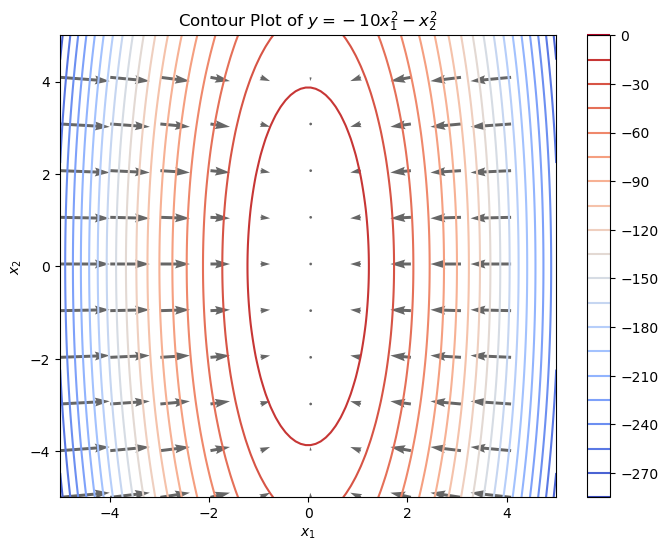

In [97]:
a = -10
b = -1

grad_scale = 1  # scaling factor for the gradient vectors

# Define a new function for the more eccentric ellipsoid
def ellipsoid(x1, x2):
    return a * x1**2 + b * x2**2

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)    # populates two dimensional arrays wherein one represents x-values and the other y-values
                                # This is a bit redundant, but numpy will evalute the function by sweeping across both
                                # matrices in parallel using vector operations.
Y = ellipsoid(X1, X2)           # evaluates at every (x1, x2) position in the X1, X2 matrices.

# Adjust spacing to reduce the number of gradient vectors
new_spacing = 10  
X1_sub = X1[::new_spacing, ::new_spacing]
X2_sub = X2[::new_spacing, ::new_spacing]

# Compute gradient vectors 
grad_x1 = grad_scale * 2 * a * X1_sub
grad_x2 = grad_scale * 2 * b * X2_sub

# Plot the contour plot with selectively placed gradient vectors on the more eccentric ellipsoid
plt.figure(figsize=(8, 6))
contour = plt.contour(X1, X2, Y, levels=20, cmap="coolwarm")
plt.colorbar(contour)

# Add fewer gradient vectors selectively at level curve positions
plt.quiver(X1_sub, X2_sub, grad_x1, grad_x2, color='black', angles='xy', scale_units='xy', scale=100, alpha=0.6)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Contour Plot of $y = -10x_1^2 - x_2^2$')
plt.show()

Note that the gradient vectors in the ellipsoid contour plot do not all point directly at the peak.  Instead
they point perpendicular to the contour curves.  

#### Example II.3: Colliding flows

$$
f(\mathbf{x}) = x_1 x_2^2 + a x_2,\quad \\
\nabla f(\mathbf{x}) = \begin{bmatrix}
  \frac{\partial}{\partial x_1} x_1 x_2^2 + a x_2 \\
  \frac{\partial}{\partial x_2} x_1 x_2^2 + a x_2
\end{bmatrix} = 
\begin{bmatrix}
  x_2^2 \\
  2 x_1 x_2 + a
\end{bmatrix}
$$

In [98]:
a = 0.5

def f(x1, x2):
    return x1 * x2**2 + a * x2

Y = f(X1, X2) 

# compute gradient
grad_x1 = X2**2   # performs an elementwise squaring.  It is taking the Hadamard product of X2 with itself.
grad_x2 = 2 * X1 * X2 + a


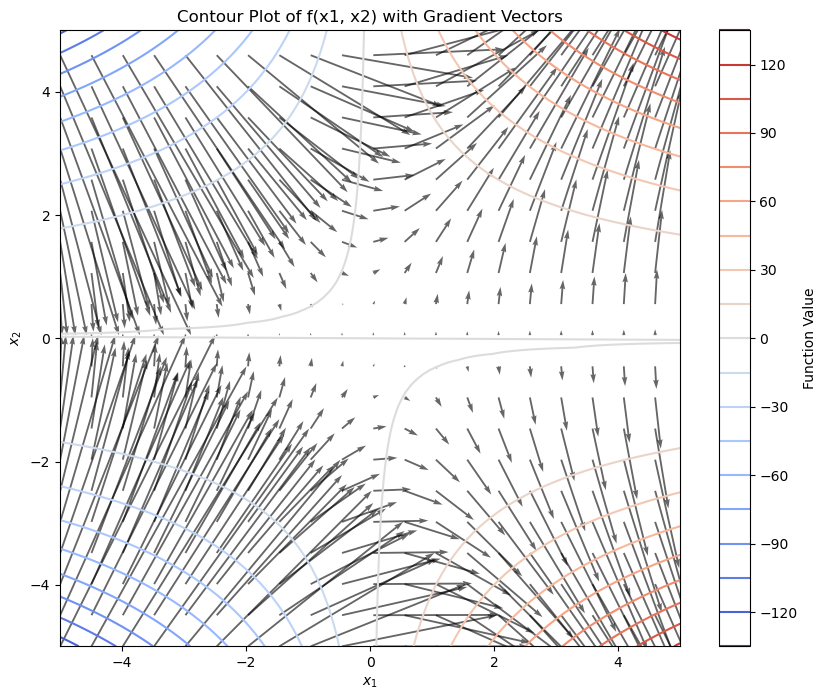

In [99]:
# Select every 5th point for a sparse quiver plot
skip = (slice(None, None, 5), slice(None, None, 5))

# Plot the contour and the sparser gradients
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Y, levels=20, cmap='coolwarm')
plt.quiver(X1[skip], X2[skip], grad_x1[skip], grad_x2[skip], color='black', angles='xy', scale_units='xy', scale=10, alpha=0.6)

# Add labels and display the plot
plt.title("Contour Plot of f(x1, x2) with Gradient Vectors")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.colorbar(contour, label="Function Value")
plt.show()

* $\mathbf{x}$ is a vector, $y$ is a scalar.

$$\nabla_{\mathbf{x}} f(\mathbf{x},y) = \begin{bmatrix}
  \frac{\partial f}{\partial x_1} \\
  \frac{\partial f}{\partial x_2} \\
  \vdots \\
  \frac{\partial f}{\partial x_n} \\
\end{bmatrix}
$$ 

When we specify a subscript to the $\nabla$ the gradient is only taken with respect to the variables specified
in the subscript.


#### Example II.4:

$$
f(\mathbf{x}, y) = x_1 x_2^2 y + a x_2,\quad \\
\nabla_\mathbf{x} f(\mathbf{x}, y) = \begin{bmatrix}
  \frac{\partial}{\partial x_1} x_1 x_2^2 y + a x_2 \\
  \frac{\partial}{\partial x_2} x_1 x_2^2 y + a x_2
\end{bmatrix} = 
\begin{bmatrix}
  y x_2^2 \\
  2 x_1 x_2 y + a
\end{bmatrix}
$$

* $\mathbf{x}$ is a column vector.  $A$ is a square matrix.  $f(\mathbf{x}) = \mathbf{x}^T A \mathbf{x}$.

Because $f(\mathbf{x}) = \mathbf{x}^T A \mathbf{x}$ is a scalar function, we can apply the gradient.

#### Example II.5:

$$\text{let } A = \begin{bmatrix}
    2 & 1 \\
    1 & 3
  \end{bmatrix},\quad 
  \mathbf{x} = \begin{bmatrix}
    x_1 \\
    x_2
  \end{bmatrix},\quad
  f(\mathbf{x}) = \mathbf{x}^T A \mathbf{x}
$$

Find $\nabla_{\mathbf{x}} f(\mathbf{x})$.

\begin{align}
  \nabla_{\mathbf{x}}
  \begin{bmatrix}
    x_1 \\
    x_2
  \end{bmatrix}^T \begin{bmatrix}
    2 & 1 \\
    1 & 3
  \end{bmatrix} 
  \begin{bmatrix}
    x_1 \\
    x_2
  \end{bmatrix}
&= \nabla_{\mathbf{x}}
  \begin{bmatrix}
    2 x_1 + x_2 & x_1 + 3 x_2
  \end{bmatrix} 
  \begin{bmatrix}
    x_1 \\
    x_2
  \end{bmatrix} \\
  \\
&= \begin{bmatrix}
  \frac{\partial}{\partial x_1} (2 x_1^2 + x_1 x_2 + x_1 x_2 + 3 x_2^2) \\
  \frac{\partial}{\partial x_2} (2 x_1^2 + x_1 x_2 + x_1 x_2 + 3 x_2^2)
  \end{bmatrix} \\
  \\
&= \begin{bmatrix}
    4 x_1 + 2 x_2 \\
    2 x_1 + 6 x_2
  \end{bmatrix} \\
  \\
&= 2 \begin{bmatrix}
    2 x_1 + x_2 \\
    x_1 + 3x_2
  \end{bmatrix} \\
  \\
&= 2 \begin{bmatrix}
 2 & 1 \\
 1 & 3
\end{bmatrix}
  \begin{bmatrix}
    x_1 \\
    x_2
  \end{bmatrix} \\
  \\
&= 2 A \mathbf{x}
\end{align}

This is analogous to taking the derivative of the 1-d scalar function of $f(x) = a x^2$.

$$\frac{d}{dx} f(x) = \frac{d}{dx} a x^2 = 2 a x$$

Example II.5, illustrates a general matrix calculus rule:

$$\nabla_{\mathbf{x}}~\mathbf{x}^T A \mathbf{x} = 2 A \mathbf{x}$$


```


```

**Problem 2 (cont.)**

**Problem 2(a)** From Example II.4, find $\nabla_y f(\mathbf{x}, y)$.

**Answer 2(a)**

$$
f(\mathbf{x}, y) = x_1 x_2^2 y + a x_2,\quad \\
\nabla_\mathbf{y} f(\mathbf{x}, y) = \frac{d}{dy} x_1 x_2^2 y + a x_2 = x_1 x_2^2
$$


**Problem 2(b)** Given $f(\mathbf{x}) = (x_1+2)^2 - (x_2 -1)^2$, find $\nabla f(\mathbf{x})$, the gradient of $f$ with respect to $\mathbf{x}$.  Note: $\nabla f(\mathbf{x}) = \nabla_{\mathbf{x}} f(\mathbf{x})$ since $\mathbf{x} = (x_1, x_2)$ includes all variables in $f(\mathbf{x})$.

**Answer 2(b)**

$$\nabla f(\mathbf{x}) = 
\begin{bmatrix}
  \frac{\partial}{\partial x_1} \big((x_1+2)^2 - (x_2 -1)^2 \big) \\
  \frac{\partial}{\partial x_2} \big((x_1+2)^2 - (x_2 -1)^2 \big)
\end{bmatrix} =
\begin{bmatrix}
  2(x_1+2) \\
  -2(x_2 -1))
\end{bmatrix}
$$

**Problem 2(c)** Plot the contour plot for $\nabla f(\mathbf{x})$ given in part (b), overlaying gradient vectors.

**Answer 2(c)**

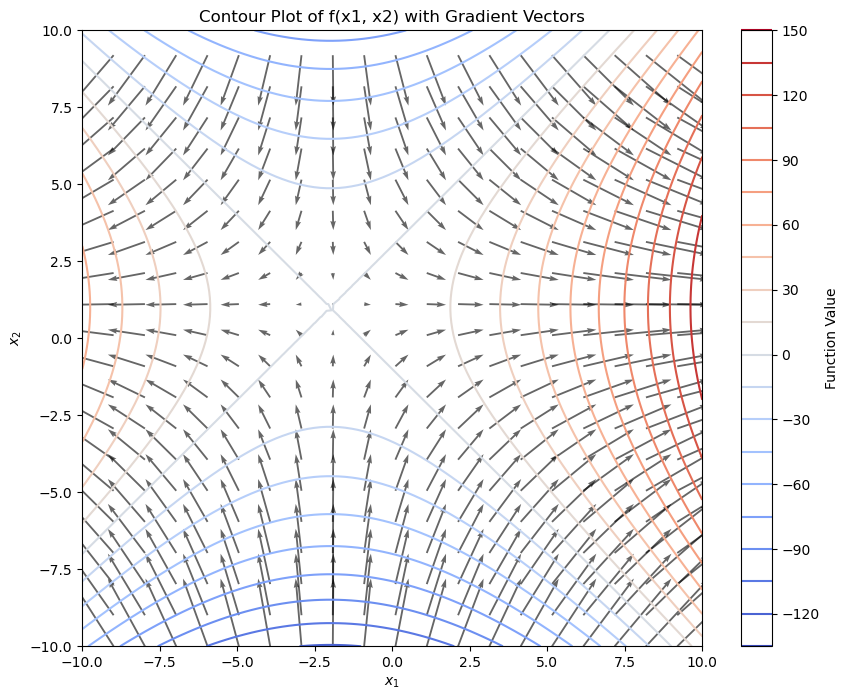

In [100]:

def f(x1, x2):
    return (x1 + 2)**2 - (x2 -1 )**2
    

x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)    # populates two dimensional arrays wherein one represents x-values and the other y-values
                                # This is a bit redundant, but numpy will evalute the function by sweeping across both
                                # matrices in parallel using vector operations.
Y = f(X1, X2)                   # evaluates at every (x1, x2) position in the X1, X2 matrices.

# compute gradient
grad_x1 = 2 * (X1 + 2)   # performs an elementwise squaring.  It is taking the Hadamard product of X2 with itself.
grad_x2 = -2 * (X2 - 1)

# Select every 5th point for a sparse quiver plot
skip = (slice(None, None, 5), slice(None, None, 5))

# Plot the contour and the sparser gradients
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Y, levels=20, cmap='coolwarm')
plt.quiver(X1[skip], X2[skip], grad_x1[skip], grad_x2[skip], color='black', angles='xy', scale_units='xy', scale=10, alpha=0.6)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

# Add labels and display the plot
plt.title("Contour Plot of f(x1, x2) with Gradient Vectors")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.colorbar(contour, label="Function Value")
plt.show()

**Problem 2(d)** Find $\nabla_\mathbf{x} f(\mathbf{x})$ where $f(\mathbf{x}) = \mathbf{a}^T \mathbf{x}$ and 

$$
\mathbf{a} = \begin{bmatrix}
  2 \\
  4 \\ 
  -7
\end{bmatrix}, \quad
\mathbf{x} = \begin{bmatrix}
  x_1 \\
  x_2 \\
  x_3
\end{bmatrix}
$$



**Answer 2(d)**

$$
\begin{align*}
  \nabla_\mathbf{x} f(\mathbf{x}) &= \nabla_\mathbf{x} \mathbf{a}^T \mathbf{x} \\
      \\
      &= 
      \nabla_\mathbf{x} \begin{bmatrix}
        2 & 4 & -7
      \end{bmatrix}
      \begin{bmatrix}
        x_1 \\
        x_2 \\
        x_3
      \end{bmatrix} \\
      \\
      &= \nabla_\mathbf{x} (2 x_1 + 4 x_2 - 7 x_3) \\
      \\
      &= 
      \begin{bmatrix}
        2 \\
        4 \\
        -7
      \end{bmatrix}
\end{align*}
$$



---
## Problem 3: Linear Regression Normal Equation

For linear regression as illustrated below, training data set $\{\mathbf{x}^{(i)}\}$ is input into a training algorithm.  The training algo is labelled below as "training algo."  The $i^{th}$ sample in the input training data set is a vector denoted by $\mathbf{x}^{(i)}$.  For each input in the training data set $\mathbf{x}^{(i})$ there is the associated scalar training data output $y^{(i)}$.  The ouput data in the training data set
is also called the *observed data*.   From the input and output training data, the training algo infers a set of parameters that characterize a hypothesis $h$.   The $h$ hypothesis is also
called "the model."  Given that the hypothesis is configured by parameters $\Theta$, $h$ is often denoted by $h_{\Theta}$.

In the context of linear regression, $h_{\Theta}(\mathbf{x})$ is a linear combination of the input features $\mathbf{x}$ and thus can be represented as a column vector $\Theta$.  If the input data has $n$ dimensions and $\mathbf{x}$ is represetned with a 1 as the first
element then $\mathbf{x}$ and $\Theta$ can be written

$$
\mathbf{x} = \begin{bmatrix}
   1 \\
   x_1 \\
   x_2 \\
   \vdots \\
   x_n 
\end{bmatrix}
,\quad \Theta = \begin{bmatrix}
   \Theta_0 \\
   \Theta_1 \\
   \Theta_2 \\
   \vdots \\
   \Theta_n 
\end{bmatrix}
$$

The output is thus a function of the input as in 

$$
y = h_{\Theta}(\mathbf{x}) = \Theta^T \mathbf{x}
$$

<>:12: SyntaxWarning: invalid escape sequence '\{'
<>:13: SyntaxWarning: invalid escape sequence '\{'
<>:27: SyntaxWarning: invalid escape sequence '\T'
<>:31: SyntaxWarning: invalid escape sequence '\T'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\h'
<>:12: SyntaxWarning: invalid escape sequence '\{'
<>:13: SyntaxWarning: invalid escape sequence '\{'
<>:27: SyntaxWarning: invalid escape sequence '\T'
<>:31: SyntaxWarning: invalid escape sequence '\T'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\h'
/var/folders/ps/l87rj9215hd5rjf5zqwjz04h0000gq/T/ipykernel_62939/743242925.py:12: SyntaxWarning: invalid escape sequence '\{'
  ax.text(0.2, 0.8, '$\{\mathbf{x}^{(i)}\}$', ha='right', va='center', fontsize=16)
/var/folders/ps/l87rj9215hd5rjf5zqwjz04h0000gq/T/ipykernel_62939/743242925.py:13: SyntaxWarning: invalid escape sequence '\{'
  ax.text(0.8, 0.8, '$\{y^{(i)}\}$', ha='left', va='

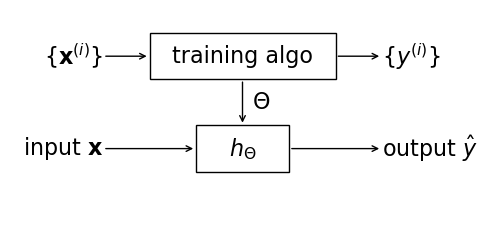

In [101]:
## Draw illustration
# If one wants to avoid including images and is willing to create simple
# diagrams programmatically, one can use matplotlib to create diagrams.
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6,3))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(0.2, 0.8, '$\{\mathbf{x}^{(i)}\}$', ha='right', va='center', fontsize=16)
ax.text(0.8, 0.8, '$\{y^{(i)}\}$', ha='left', va='center', fontsize=16)

ax.add_patch(plt.Rectangle((0.3, 0.7), 0.4, 0.2, edgecolor='black', facecolor='none'))
ax.text(0.5, 0.8, 'training algo', ha='center', va='center', fontsize=16)

# Draw arrows into and out of the training algo box.
ax.annotate("", xy=(0.2, 0.8), xytext=(0.3, 0.8),
            arrowprops=dict(arrowstyle="<-"))
ax.annotate("", xy=(0.7, 0.8), xytext=(0.8, 0.8),
            arrowprops=dict(arrowstyle="<-"))

# Draw arrow from the training algo box to the hypothesis (model) box.
ax.annotate("", xy=(0.5, 0.7), xytext=(0.5, 0.5),
            arrowprops=dict(arrowstyle="<-"))
ax.text(0.52, 0.6, '$\Theta$', ha='left', va='center', fontsize=16)


ax.add_patch(plt.Rectangle((0.4, 0.3), 0.2, 0.2, edgecolor='black', facecolor='none'))
ax.text(0.5, 0.4, '$h_{\Theta}$', ha='center', va='center', fontsize=16)

ax.text(0.2, 0.4, 'input $\mathbf{x}$', ha='right', va='center', fontsize=16)
ax.text(0.8, 0.4, 'output $\hat{y}$', ha='left', va='center', fontsize=16)

# Draw arrows into and out of the hypothesis (a.k.a., the model).
ax.annotate("", xy=(0.2, 0.4), xytext=(0.4, 0.4),
            arrowprops=dict(arrowstyle="<-"))
ax.annotate("", xy=(0.6, 0.4), xytext=(0.8, 0.4),
            arrowprops=dict(arrowstyle="<-"))

ax.axis('off')

plt.show()

For linear regression, there exists an equation that directly yields the
coefficients that minimize the sum square error.  It is known as the "normal equation."
Consider linear regression where $y$ is a function of a single variable $x$.


$$
  y = h_{\Theta}(x) = \Theta_0 + \Theta_1 x
$$

where $y$ estimates (a.k.a., predicts) the observed values $y^{(i)}$.

Given: a set of samples in a training data set ${(x^{(i)}, y^{(i)})}$
wherein $i \in [1,m]$ and $x^{(i)}$ is the $ith$ input and $y^{(i)}$ is
the real valued output associated with $x^{(i)}$.  $x \in \mathbb{R}$ and
$y \in \mathbb{R}$.

Find the "normal equation" that yields $(\Theta_0, \Theta_1)$ as a function
of $(x^{(i)}, y^{(i)})$ such that $(\Theta_0, \Theta_1)$ minimizes the following
cost function:

$$
\text{minimize } J(\Theta) = \sum_{i=1}^{m} \frac{1}{2} (h_{\Theta}(x^{(i)})-y^{(i)})^2
$$

Hint: the minimum occurs where the gradient is zero.  $\nabla J(\Theta) = 0$.

The gradient $\nabla J$ is given
$(\frac{\partial J}{\partial \Theta_0}, \frac{\partial J}{\partial \Theta_1})$.

At the minimum

\begin{equation}
   \bigg(\frac{\partial J}{\partial \Theta_0},
    \frac{\partial J}{\partial \Theta_1}\bigg) = 0
\end{equation}

You can represent the answer either using LaTeX or by scanning in a page and 
pasting it into the notebook as a base64 encoded image.  (see instructions at top of this file).

**Answer 3**

We can solve for the component of the gradient in the direction of $\Theta_0$
and $\Theta_1$ separately.

\begin{align*}
  0 &= \frac{\partial J}{\partial \Theta_0} \\
    &= \frac{\partial}{\partial \Theta_0}
      \sum_{i=1}^{m} \frac{1}{2} \big(h_\Theta(x^{(i)})-y^{(i)}\big)^2 \\
    &= \sum_{i=1}^m (\Theta_0 + \Theta_1 x^{(i)} - y^{(i)})
      \frac{\partial}{\partial \Theta_0}
      (\Theta_0 + \Theta_1 x^{(i)} - y^{(i)}) \\
    &= \sum_{i=1}^m (\Theta_0 + \Theta_1 x^{(i)} - y^{(i)}) \cdot 1
\end{align*}

If we divide both sides by $m$ then we can simplify this further

\begin{equation}
  0 = \Theta_0 + \Theta_1 \bar{x} - \bar{y}\tag{4.1}
\end{equation}

Now let's turn to the partial derivative of $J$ with respect to $\Theta_1$.

\begin{align*}
  0 &= \frac{\partial J}{\partial \Theta_1} \\
    &= \sum_{i=1}^m (\Theta_0 + \Theta_1 x^{(i)} - y^{(i)})
      \frac{\partial}{\partial \Theta_1}
      (\Theta_0 + \Theta_1 x^{(i)} - y^{(i)}) \\
    &= \sum_{i=1}^m (\Theta_0 + \Theta_1 x^{(i)} - y^{(i)}) \cdot x^{(i)} \\
\end{align*}

We can similarly divide both sides by $m$ to simplify the equation.

\begin{equation}
  0 = \Theta_0 \bar{x} + \frac{1}{m} \sum_{i=1}^m \Theta_1 \cdot (x^{(i)})^2
    - \frac{1}{m} \sum_{i=1}^{m} x^{(i)} y^{(i)}\tag{4.2}
\end{equation}

Solving (4.1) for $\Theta_0$ and substituting the result into (4.2) yields

\begin{equation*}
  0 = (\bar{y}-\Theta_1 \bar{x}) \bar{x}
    + \frac{\Theta_1}{m} \sum_{i=1}^m (x^{(i)})^2 - \frac{1}{m} \sum_{i=1}^m x^{(i)} y^{(i)}
\end{equation*}

Rearranging

\begin{equation}
\Theta_1 \cdot \bigg(\bar{x}^2 - \frac{1}{m}\sum_{i=1}^m (x^{(i)})^2 \bigg)
  = \bar{x}\bar{y} - \frac{1}{m} \sum_{i=1}^m x^{(i)} y^{(i)} \tag{4.3}
\end{equation}

If we replaced $m$ on the right-hand side with $m-1$ then this would
be the sample covariance of $X$ and $Y$.  For any sizable $m$ the $-1$
becomes negligible.  The right-hand side is $\approx -Cov(X,Y)$ where
$X$ denotes the random variable from which the samples $\{x^{(1)},
x^{(2)}, \dots, x^{(m)}\}$ are drawn.  Analogously for $Y$.

Similarly if we replace $m$ with $m-1$ in the denominator on the left-hand-side,
the left-hand side becomes $\approx -\Theta_1 s_x^2$.

In the limit as $m \rightarrow \infty$, equation (4.3) thus becomes

\begin{equation}
  \boxed{\Theta_1 = \frac{Cov(X,Y)}{s_x^2}}
\end{equation}

and $\Theta_0$ is given by

\begin{equation}
\boxed{
  \Theta_0 = \bar{y}-\Theta_1\bar{x} = \bar{y}- \bar{x} \frac{Cov(X,Y)}{s_x^2}
}
\end{equation}

**Grading Instructions**

It is not necessary for the student to have seen the connection to sample covariance, but
it does provide a great intuition.  The slope becomes the scaled covariance, and
the regression line passes through the centroid $(\bar{x}, \bar{y})$ allowing us
to project it back to the y-intercept to get $\Theta_0$.

---
## Problem 4

You have already derived the normal equation for linear regression with a single feature (one-dimensional input). In this problem, you will implement linear regression from scratch using this equation.

**Requirements**

You are allowed to use NumPy for basic matrix operations, but you must not use any built-in functions or libraries for performing linear regression such as numpy.linalg.lstsq, numpy.polyfit, scipy.stats.linregress, or similar.

**Data**

Given a set of data points (x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n), write a function that fits a straight line y = mx + c to the data by minimizing the mean squared error.

$$
\text{minimize } J(\Theta) = \sum_{i=1}^{m} \frac{1}{2} (h_{\Theta}(x^{(i)})-y^{(i)})^2
$$


The dataset for this problem can be found in the class github repository at

    https://github.com/dosirrah/CSCI632_24F_MachineLearning/hw2/prob5/pb5_trainig_data.csv

This dataset contains two columns

* The first column conteains the input values $\mathbf{X}$.
* The second column contain the observed output values $y$.

To view the data, you can use the `head` command from the terminal as follows:

    % head p5_training_data.csv 
    X,y
    0.0,0.4967141530112327
    0.10101010101010101,0.11391758985007505
    0.20202020202020202,1.1499963521561645
    0.30303030303030304,2.271372616818459
    0.40404040404040403,0.7541400515935256
    0.5050505050505051,0.9860915764519412

The first column contains the inputs $\mathbf{X}$ and the second column the observed
data (outputs) $y$.  

The data is visualized below.

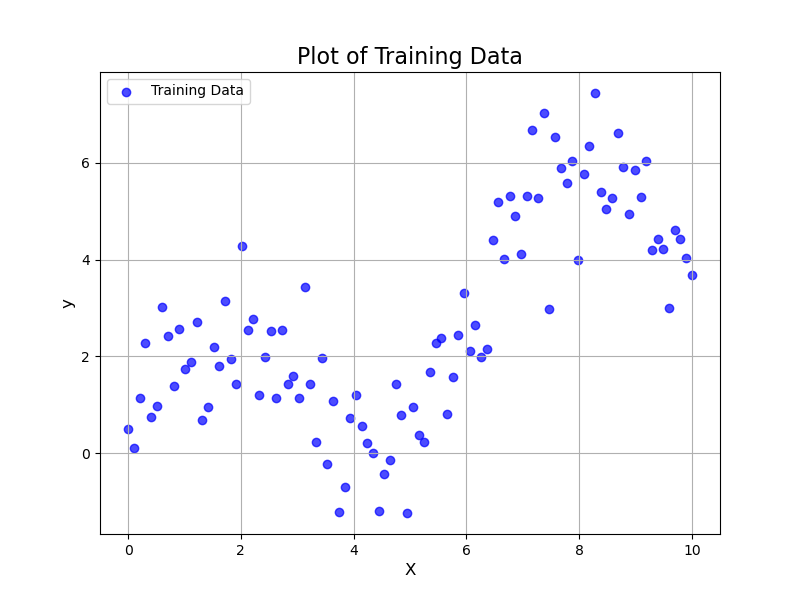


**Problem 4(a)** Implement linear regression for a single dimension using your solution to problem 3.


**Possible Answer 4(a)** 



In [102]:
import numpy as np
import numpy.typing as npt
import numpy.testing as nptest
from typing import Tuple
import unittest

# This could be implemented as two functions such as "learn" and "predict."  
# Or like np.linalg.lstsq.  Here I show it implemented as functor.
# The constructor is used to "train" the functor.  The call operator
# makes perdictions.
class LinearRegression(object):

    def __init__(self, x: npt.NDArray[np.float_], y: npt.NDArray[np.float_]):
        """
        Args:
          x (numpy.ndarray): x values of the training dataset.  For more general linear regression 
                models, each x would be a vector, but this is a one-dimensional linear regression.
          y (numpy.ndarray): observed (i.e., y) values of the training dataset.
        """
        cov_matrix = np.cov(x, y)
        cov = cov_matrix[0, 1]
        varx = cov_matrix[0, 0]
        self._theta1 = cov / varx 
        xbar, ybar = np.mean(x), np.mean(y)
        self._theta0 = ybar - self._theta1 * xbar

    @property
    def theta0(self):
        return self._theta0

    @property
    def theta1(self):
        return self._theta1
        
    def __call__(self, x: npt.NDArray[np.float_]) -> float:
        """
        Performs a prediction based on the linear regression model.

        Args:
          x (numpy.ndarray): x-values input to the model.

        Returns:
          numpy.ndarray: predictions (i.e., y values) for the passed x values.
        """  

        y = self._theta0 + self._theta1 * x
        return y

# We should always unit test, but these tests are not required for credit.
class TestLinearRegression(unittest.TestCase):
    def test_zero_slope(self):
        x = np.array([0, 1])
        y = np.array([1, 1])
        r = LinearRegression(x, y)

        self.assertEqual(r.theta0, 1)
        self.assertEqual(r.theta1, 0)
        xtest = np.array([1, 2, 3])
        nptest.assert_array_equal(r(xtest), [1, 1, 1])

    def test_one_slope(self):
        x = np.array([10, 11])
        y = np.array([10, 11])
        r = LinearRegression(x, y)
        
        self.assertEqual(r.theta0, 0)
        self.assertEqual(r.theta1, 1)
        xtest = np.array([5, 100])
        nptest.assert_array_equal(r(xtest), [5, 100])

    def test_negative_slope_with_offset(self):
        x = np.array([0, 1])
        y = np.array([1, -1])
        r = LinearRegression(x, y)
        xtest= np.array([5, 100])
        nptest.assert_array_equal(r(xtest), [-9, -199])
        

In [103]:
# Alternate implementation
def linear_regression(x: npt.NDArray[np.float_], y: npt.NDArray[np.float_]) -> Tuple[float, float]:

    cov_matrix = np.cov(x, y)
    cov = cov_matrix[0, 1]
    varx = cov_matrix[0, 0]
    theta1 = cov / varx 
    xbar, ybar = np.mean(x), np.mean(y)
    theta0 = ybar - theta1 * xbar
    return theta0, theta1

def linear_predict(theta0: float, theta1: float, x: npt.NDArray[np.float_]):
    y = theta0 + theta1 * x
    return y 

# We should always unit test, but these tests are not required for credit.
class TestLinearRegression2(unittest.TestCase):
    def test_zero_slope(self):
        x = np.array([0, 1])
        y = np.array([1, 1])
        theta0, theta1 = linear_regression(x, y)

        self.assertEqual(theta0, 1)
        self.assertEqual(theta1, 0)
        xtest = np.array([1, 2, 3])
        nptest.assert_array_equal(linear_predict(theta0, theta1, xtest), [1, 1, 1])

    def test_one_slope(self):
        x = np.array([10, 11])
        y = np.array([10, 11])
        theta0, theta1 = linear_regression(x, y)
        
        self.assertEqual(theta0, 0)
        self.assertEqual(theta1, 1)
        xtest = np.array([5, 100])
        nptest.assert_array_equal(linear_predict(theta0, theta1, xtest), [5, 100])

    def test_negative_slope_with_offset(self):
        x = np.array([0, 1])
        y = np.array([1, -1])
        theta0, theta1 = linear_regression(x, y)
        xtest= np.array([5, 100])
        nptest.assert_array_equal(linear_predict(theta0, theta1, xtest), [-9, -199])
        

**Problem 4(b): Create a Hold-out**

When training a machine learning model, it’s common practice to set aside a subset of the data called a hold-out set for testing. This ensures that the model is evaluated on data it hasn’t seen during training.

1.	Randomly select 10% of the dataset to form the *hold-out* set.
2.	Subtract the hold-out set from the training data, leaving 90% of the data for training.
3.	Use matplotlib to create a plot that:
 * Displays the training data.
 * Displays the hold-out data in a different color so that it can be visually distinguished from the training data.
 
Aside: to create the hold-out set, you can use `numpy.random.choice` or `numpy.random.shuffle`.


['./p4_training_data.csv']
data_file: './p4_training_data.csv'
globbed file name './p4_training_data.csv'
globbed file exists: True
data_file name == globbed file name: True
data_file exists: True


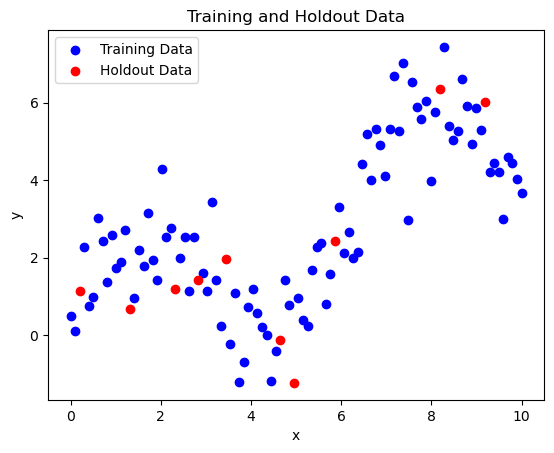

In [104]:
import os
from glob import glob
from numpy.random import permutation
import matplotlib.pyplot as plt

np.random.seed(131)

data_path = "./"
data_file = os.path.join(data_path, "p4_training_data.csv")
print(glob(os.path.join(data_path, "*.csv")))
print("data_file: '%s'" % data_file)
print("globbed file name '%s'" % glob(os.path.join(data_path, "*.csv"))[0])

print("globbed file exists:", os.path.exists(glob(os.path.join(data_path, "*.csv"))[0]))
print("data_file name == globbed file name:", data_file == glob(os.path.join(data_path, "*.csv"))[0])
print("data_file exists:", os.path.exists(data_file))


holdout_ratio = 0.1

data = np.genfromtxt(data_file, delimiter=",", skip_header=1)

holdlen = int(holdout_ratio * len(data))

shuffled = permutation(data)  # could also use choice or shuffle.
holdout, training = shuffled[:holdlen], shuffled[holdlen:]

# Plot the data
plt.scatter(training[:, 0], training[:, 1], color='blue', label='Training Data')
plt.scatter(holdout[:, 0], holdout[:, 1], color='red', label='Holdout Data')

# Annotate the plot
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training and Holdout Data")
plt.legend()
plt.show()
    

**Problem 4(c): Train the Model**

Using the training data excluding the hold-out, run your linear regression algorithm developed for 4(a).  This process is "training your model."


**Answer 4(c)**

Aside: This is unknown to the student, but the data was generated as follows:

    true_val = 2 * np.sin(X) + 0.5 * X
    # Add Gaussian noise
    noise = np.random.normal(0, 1, n_points)
    y = true_val + noise

Coefficients from "training your model" should be $\theta_0 \in (0,1)$ and $\theta_1 \in (0.3, 1)$.


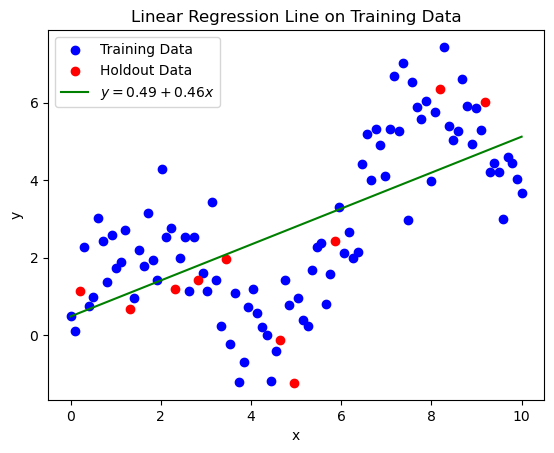

In [105]:

xtrain, ytrain = training[:,0], training[:, 1]
predict = LinearRegression(xtrain, ytrain)

# I didn't ask for a plot, but let's do it to see how the line looks.
x = np.linspace(0, 10, 100)

# Calculate the corresponding y-values for the line
yhat = predict.theta0 + predict.theta1 * x

plt.scatter(training[:, 0], training[:, 1], color='blue', label='Training Data')
plt.scatter(holdout[:, 0], holdout[:, 1], color='red', label='Holdout Data')
plt.plot(x, yhat, color='green', label=f'$y = {predict.theta0:.2f} + {predict.theta1:.2f}x$')

# Annotate the plot
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Line on Training Data")
plt.legend()



**Problem 4(d): Test the Model**

Now we will test your model using the hold-out set. 

1. For each $x^{(i)}$ in your hold-out set, compute the predicted value $\hat{y}^{(i)}$.
2. Compute the *root-mean-square error (RMSE)* for the predicated values and the observed values in the hold-out set.

$$   
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \hat{y}^{(i)} - y^{(i)} \right)^2}
$$ 


**Answer 4(d)**

In [106]:
xho, yho = holdout[:,0], holdout[:, 1]
yp = predict(xho)

# compute rmse using vector operations via numpy.
ydiff = yp - yho
linear_rmse = np.sqrt((1/len(yho)) * np.sum(np.dot(ydiff, ydiff)))

print(f"linear_rmse: {linear_rmse}")

# equivalent computation of rmse without numpy, i.e., slower to compute.
import math
sse = 0.0
for yp, y in zip(yp, yho):
    sse += (yp - y) * (yp - y)
mse = sse / len(yho)
linear_rmse = math.sqrt(mse)
print(f"linear_rmse: {linear_rmse}")



linear_rmse: 1.7619454670537866
linear_rmse: 1.7619454670537864


---
## Problem 5: Locally Weighted Linear Regression

With Locally-Weighted Linear Regression (LWLR), we have no separate training phase.  Instead LWLR keeps all or a subset of the training data as part of a hypothesis $h$ (a.k.a., the model).   When an input vector  $\mathbf{x}$  is passed to the model, it infers the output $y$ by performing a linear regression, placing more weight on the training points $\mathbf{x}^{(i)}$  that are closer to  $\mathbf{x}$. The way proximity is measured and how nearby points are weighted is determined by a *kernel function.*


<>:12: SyntaxWarning: invalid escape sequence '\{'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\{'
<>:25: SyntaxWarning: invalid escape sequence '\m'
/var/folders/ps/l87rj9215hd5rjf5zqwjz04h0000gq/T/ipykernel_62939/4229381177.py:12: SyntaxWarning: invalid escape sequence '\{'
  ax.text(0.5, 0.85, '$\{(\mathbf{x}^{(i)}, y^{(i)})\}$', ha='center', va='center', fontsize=16)
/var/folders/ps/l87rj9215hd5rjf5zqwjz04h0000gq/T/ipykernel_62939/4229381177.py:25: SyntaxWarning: invalid escape sequence '\m'
  ax.text(0.2, 0.4, 'input $\mathbf{x}$', ha='right', va='center', fontsize=16)


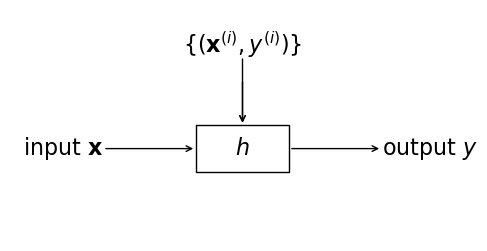

In [107]:
## Draw plot
# If one wants to avoid including images and is willing to create simple
# diagrams programmatically, one can use matplotlib to create diagrams.
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6,3))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

ax.text(0.5, 0.85, '$\{(\mathbf{x}^{(i)}, y^{(i)})\}$', ha='center', va='center', fontsize=16)

# Draw arrows into and out of the training algo box.
ax.annotate("", xy=(0.5, 0.8), xytext=(0.5, 0.5),
            arrowprops=dict(arrowstyle="<-"))

# Draw arrow from the training algo box to the hypothesis (model) box.
ax.annotate("", xy=(0.5, 0.7), xytext=(0.5, 0.5),
            arrowprops=dict(arrowstyle="<-"))

ax.add_patch(plt.Rectangle((0.4, 0.3), 0.2, 0.2, edgecolor='black', facecolor='none'))
ax.text(0.5, 0.4, '$h$', ha='center', va='center', fontsize=16)

ax.text(0.2, 0.4, 'input $\mathbf{x}$', ha='right', va='center', fontsize=16)
ax.text(0.8, 0.4, 'output $y$', ha='left', va='center', fontsize=16)

# Draw arrows into and out of the hypothesis (a.k.a., the model).
ax.annotate("", xy=(0.2, 0.4), xytext=(0.4, 0.4),
            arrowprops=dict(arrowstyle="<-"))
ax.annotate("", xy=(0.6, 0.4), xytext=(0.8, 0.4),
            arrowprops=dict(arrowstyle="<-"))

ax.axis('off')

plt.show()

One common and simple kernel function is **$k$-nearest neighbors (k-NN) regression**.  In $k-NN$ regression, the kernel function assigns equal weights to the $k$-nearest neighbors to input $\mathbf{x}$ and assigs zero weight to all other data points in the training set.

The $k-NN$ kernel is computationally scalable because the normal equation deriving the 
coefficients of the linear model is evaluated only on the $k$-nearest neighbors.



**Problem 5(a)** Implement Locally-Weighted Linear Regression using a k-NN kernel.  Your code should use the normal equation you derived in Problem 3 and also used in the linear regression implementation in Problem 4.  Analogous to Problem 4, do not use any existing implementation of LWLR.  You may use NumPy for basic matrix operations. 

In [108]:
from hw4_linear_regression import LinearRegression
from typing import Union
import numpy
import numpy as np
import numpy.testing as nptest
import numpy.typing as npt

# Type hint that allows either a numpy array of floats or a scalar float
FloatArrayOrScalar = Union[npt.NDArray[np.float_], float]

def verror(b: bool):
    if not b:
        raise ValueError()

def is_numeric(val):
    return isinstance(val, (int, float, np.integer, np.floating))

class LWLR(object):
    def __init__(self, x: npt.NDArray[np.float_], y: npt.NDArray[np.float_], k: int):
        """
        Args:
          x (numpy.ndarray): x values of the training dataset.  For more general linear regression 
                models, each x would be a vector, but this is a one-dimensional linear regression.
          y (numpy.ndarray): target (a.k.a., observed) values of the training dataset.
          k (int): k-Nearest-Neighbors.
        """

        verror(k > 0)
        verror(len(x) > 1)
        verror(len(x) == len(y))
        
        self._x = x
        self._y = y
        self._k = k

        # Step 1: Combine x and y into a 2D array
        xy = np.column_stack((x, y))

        # Step 2: Sort the array based on the first column (x-values)
        # xy[:, 0] creates a "view" object representing all values in the first column.
        #
        # xy[:, 0].argsort() creates a numpy array of indices in order of the data they
        # reference, which in this case would be in ascending order of the first column
        # referenced by xy[:, 0].
        #
        # xy[xy[:,0].argsort()] creates a new 2d numpy array sorted in ascending
        # order based on the first column.
        self._sorted_xy = xy[xy[:, 0].argsort()]

    @property
    def data(self):
        return self._sorted_xy

    def _find_knn(self, x):
        xy = self._sorted_xy
        if len(xy) <= self._k:
            return xy
        i = np.searchsorted(xy[:, 0], x)
        lo, hi = i, i
        inf = float("inf")
        while hi - lo < self._k:
            if hi < len(xy):            # find distance to next highest.
                hi_d = xy[hi][0] - x
            else:
                hi_d = inf
            if lo > 0:                  # find distance to next lowest
                lo_d = x - xy[lo-1][0]
            else:
                lo_d = inf
            if lo_d < hi_d:             # extend the range to include the nearer.
                lo -= 1
            else:
                hi += 1
        knn = xy[lo:hi]
        return knn
            
    def __call__(self, x: FloatArrayOrScalar):

        if np.isscalar(x):
            x = np.array([x])

        vals = np.empty(len(x), dtype=np.float64)
        for i, xval in enumerate(x):
            # find k-nearest.
            knn = self._find_knn(xval)

            if len(knn) == 1:
                vals[i] = knn[0,1]
            else:
                # compute normal equation over the k-nearest.
                r = LinearRegression(knn[:,0], knn[:,1])
                vals[i] = r(xval)
        return vals

import unittest

class TestLWLR(unittest.TestCase):
    def test_bad_init(self):
        x = np.array([2, 1])
        y = np.array([1, 3])

        try:
            r = LWLR(x, y, 0)
            self.assertTrue(False)  # should not reach here.
        except ValueError:
            pass

        try:
            r = LWLR(x, None, 0)
            self.assertTrue(False)  # should not reach here.
        except:
            pass

        try:
            x = np.array([2])
            y = np.array([1])
            r = LWLR(x, y, 0)
            self.assertTrue(False)  # should not reach here.
        except:
            pass

    
    def test_data_sorting(self):
        x = np.array([2, 1])
        y = np.array([1, 3])
        
        r = LWLR(x, y, 3)

        nptest.assert_array_equal(r.data[:, 0], [1, 2])
        nptest.assert_array_equal(r.data[:, 1], [3, 1])

    
    def test_find_knn(self):
        x = np.array([2, 1, 4, 12])
        y = np.array([1, 3, 0, -10])
        r = LWLR(x, y, 2)

        # below smallest x.  Should pick first 2.
        knn = r._find_knn(0)
        self.assertEqual(len(knn), 2)
        nptest.assert_array_equal(knn, [[1, 3], [2, 1]])

        # bigger than biggest.
        knn = r._find_knn(13)
        self.assertEqual(len(knn), 2)  
        nptest.assert_array_equal(knn, [[4, 0], [12, -10]])

        # in the middle.
        knn = r._find_knn(1.2)
        self.assertEqual(len(knn), 2)
        nptest.assert_array_equal(knn, [[1, 3], [2, 1]])
        knn = r._find_knn(4)
        self.assertEqual(len(knn), 2)
        nptest.assert_array_equal(knn, [[2, 1], [4, 0]])

        knn = r._find_knn(8)
        self.assertEqual(len(knn), 2)
        nptest.assert_array_equal(knn, [[4, 0], [12, -10]])

    def test_1nn(self):
        x = np.array([2, 1, 4, 12])
        y = np.array([1, 3, 0, -10])
        r = LWLR(x, y, 1)

        knn = r._find_knn(0)
        self.assertEqual(len(knn), 1)
        nptest.assert_array_equal(knn, [[1, 3]])

        knn = r._find_knn(1.4)
        self.assertEqual(len(knn), 1)
        nptest.assert_array_equal(knn, [[1, 3]])

        knn = r._find_knn(1.6)
        self.assertEqual(len(knn), 1)
        nptest.assert_array_equal(knn, [[2, 1]])

        knn = r._find_knn(4)
        self.assertEqual(len(knn), 1)
        nptest.assert_array_equal(knn, [[4, 0]])

        knn = r._find_knn(7)
        self.assertEqual(len(knn), 1)
        nptest.assert_array_equal(knn, [[4, 0]])

        knn = r._find_knn(10)
        self.assertEqual(len(knn), 1)
        nptest.assert_array_equal(knn, [[12, -10]])

        knn = r._find_knn(15)
        self.assertEqual(len(knn), 1)
        nptest.assert_array_equal(knn, [[12, -10]])

    def test_k1_regression(self):
        x = np.array([1, 2, 3])
        y = np.array([1, 2, 0])
        r = LWLR(x, y, 1) # k=1 means it just picks the nearest neighbor.
        self.assertEqual(r(0), 1)
        self.assertEqual(r(1), 1)
        self.assertEqual(r(1.4), 1)
        self.assertEqual(r(1.6), 2)
        self.assertEqual(r(2), 2)
        self.assertEqual(r(2.6), 0)
        self.assertEqual(r(3), 0)
        self.assertEqual(r(5), 0)
        #self.assertEqual(r(100), 0)

    def test_k2_regression(self):
        x = np.array([1, 2, 3])
        y = np.array([1, 2, 0])
        r = LWLR(x, y, 2)  # k=2 creates a line passing through the 2 nearest.
        self.assertEqual(r(0), 0)
        self.assertEqual(r(1), 1)
        self.assertEqual(r(1.5), 1.5)
        self.assertEqual(r(2), 2)
        self.assertEqual(r(2.5), 1)  
        self.assertEqual(r(4), -2)  
        nptest.assert_array_equal(r([0, 1, 2.5]), [0, 1, 1])

if __name__ == "__main__":
    unittest.main(argv=[''], verbosity=2, exit=False)
        

test_1nn (__main__.TestLWLR.test_1nn) ... ok
test_bad_init (__main__.TestLWLR.test_bad_init) ... ok
test_data_sorting (__main__.TestLWLR.test_data_sorting) ... ok
test_find_knn (__main__.TestLWLR.test_find_knn) ... ok
test_k1_regression (__main__.TestLWLR.test_k1_regression) ... ok
test_k2_regression (__main__.TestLWLR.test_k2_regression) ... ok
test_negative_slope_with_offset (__main__.TestLinearRegression.test_negative_slope_with_offset) ... ok
test_one_slope (__main__.TestLinearRegression.test_one_slope) ... ok
test_zero_slope (__main__.TestLinearRegression.test_zero_slope) ... ok
test_negative_slope_with_offset (__main__.TestLinearRegression2.test_negative_slope_with_offset) ... ok
test_one_slope (__main__.TestLinearRegression2.test_one_slope) ... ok
test_zero_slope (__main__.TestLinearRegression2.test_zero_slope) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.008s

OK


**Problem 5(b)** Use the same training data and hold-out as in Problem 3.  Initialize the LWLR model with the training data excluding the hold-out.
Create a $xy$ plot with the observed values and predictions in the $y$ and the input along the $x$ axis.  On this plot, show the training data in blue, the hold out in red, and a green curve generated by sweeping the input $x$ from 0 to 10 in 500 increments.  Use $k=10$.

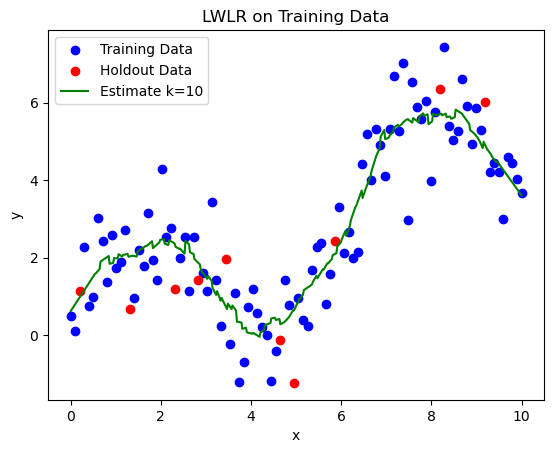

In [109]:
r = LWLR(training[:, 0], training[:, 1], k=10)

# It isn't asked in the problem for you to generate a plot, but it
# provides a nice visual. 
x = np.linspace(0, 10, 500)
yhat = r(x)

plt.scatter(training[:, 0], training[:, 1], color='blue', label='Training Data')
plt.scatter(holdout[:, 0], holdout[:, 1], color='red', label='Holdout Data')
plt.plot(x, yhat, color='green', label=f'Estimate k=10')

# Annotate the plot
plt.xlabel("x")
plt.ylabel("y")
plt.title("LWLR on Training Data")
plt.legend()

**Problem 5(c): Test the Model**

Write code to compute the *RMSE* for the hold-out with $k=3$, $k=10$ and $k=90$. Present the resulting RMSE values in a table with one row for each $k$ value and a row containig the results form 4(d). Did LWLR outperform linear regression?  Why? 

In [ ]:
from IPython.display import display, Markdown

xho, yho = holdout[:,0], holdout[:, 1]

r3 = LWLR(training[:, 0], training[:, 1], k=3)
r10 = LWLR(training[:, 0], training[:, 1], k=10)
r90 = LWLR(training[:, 0], training[:, 1], k=90)

yhat3 = r3(xho)
yhat10 = r10(xho)
print(list(enumerate(zip(yhat3, yhat10))))
yhat90 = r90(xho)

def rmse(yhat, yho):
    ydiff = yhat - yho
    return np.sqrt((1/len(yho)) * np.sum(np.dot(ydiff, ydiff)))

header = ["k", "rmse"]
rows = [
    ["3", f"{rmse(yhat3, yho):.8f}"],
    ["10", f"{rmse(yhat10, yho):.8f}"],
    ["90", f"{rmse(yhat90, yho):.8f}"],
    ["linear", f"{linear_rmse:.8f}"]
]

# Create the Markdown table string
table = "| " + " | ".join(header) + " |\n"
table += "| " + " | ".join(["---"] * len(header)) + " |\n"
for row in rows:
    table += "| " + " | ".join(row) + " |\n"

#print(f"LWLR RMSE: {lwlr_rmse}")
#print(f"Linear RMSE: {linear_rmse}")

display(Markdown(table))

[(0, (2.4608619992656813, 2.094291343637965)), (1, (4.862485716851271, 4.905521929003349)), (2, (2.07174029349566, 1.8674673231225527)), (3, (0.5292569953749009, 0.4232787344551592)), (4, (2.14150150171887, 2.03285214049594)), (5, (0.8217936635186778, 0.9814895985473144)), (6, (0.22109627250976072, 0.75036947311159)), (7, (0.7787133043071082, 0.6366588854735298)), (8, (6.193402372069813, 5.703465645242569)), (9, (2.510144243407567, 2.281907771387739))]


| k | rmse |
| --- | --- |
| 3 | 1.15240643 |
| 10 | 1.01423559 |
| 90 | 1.76194547 |
| linear | 1.76194547 |


**Probem 5(d): Plot Regression Curves**

Generate the same plot as in 5(b), except add separate curves for $k=1$, $k=3$, $k=10$,
and $k=90$ while varying $x$ from 0 to 10 in 500 increments. $k=1$ means "use the value
of the closest point."

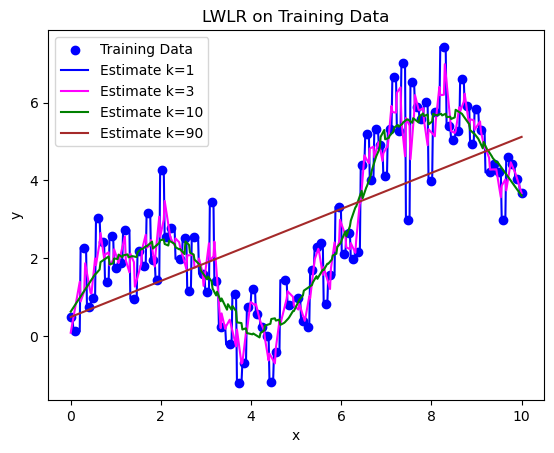

In [113]:
x = np.linspace(0, 10, 500)
r1 = LWLR(training[:, 0], training[:, 1], k=1)
yhat1 = r1(x)
yhat10 = r10(x)
yhat3 = r3(x)
yhat90 = r90(x)

plt.scatter(training[:, 0], training[:, 1], color='blue', label='Training Data')
#plt.scatter(holdout[:, 0], holdout[:, 1], color='red', label='Holdout Data')
plt.plot(x, yhat1, color='blue', label=f'Estimate k=1')
plt.plot(x, yhat3, color='magenta', label=f'Estimate k=3')
plt.plot(x, yhat10, color='green', label=f'Estimate k=10')
plt.plot(x, yhat90, color='brown', label=f'Estimate k=90')

# Annotate the plot
plt.xlabel("x")
plt.ylabel("y")
plt.title("LWLR on Training Data")
plt.legend()

In [112]:
# Run unit tests.
unittest.main(argv=[''], verbosity=2, exit=False)


test_1nn (__main__.TestLWLR.test_1nn) ... ok
test_bad_init (__main__.TestLWLR.test_bad_init) ... ok
test_data_sorting (__main__.TestLWLR.test_data_sorting) ... ok
test_find_knn (__main__.TestLWLR.test_find_knn) ... ok
test_k1_regression (__main__.TestLWLR.test_k1_regression) ... ok
test_k2_regression (__main__.TestLWLR.test_k2_regression) ... ok
test_negative_slope_with_offset (__main__.TestLinearRegression.test_negative_slope_with_offset) ... ok
test_one_slope (__main__.TestLinearRegression.test_one_slope) ... ok
test_zero_slope (__main__.TestLinearRegression.test_zero_slope) ... ok
test_negative_slope_with_offset (__main__.TestLinearRegression2.test_negative_slope_with_offset) ... ok
test_one_slope (__main__.TestLinearRegression2.test_one_slope) ... ok
test_zero_slope (__main__.TestLinearRegression2.test_zero_slope) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.008s

OK
